In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("..")

from opdynamics.utils.reading_tools import (parse_experiment_params,
                                            make_tuple,
                                            count_experiment_runs,
                                            get_runs_paths)
from opdynamics.utils.results_tools import get_experiment_mean_data
from opdynamics.utils.plotting.formatting import (classical_structure,
                                                  format_text)

In [9]:
import os

base_path = "../results/large_graph_single_polarized_group_kappa_15_25_lambda_1/"
folders = os.listdir(base_path)
folders = [base_path + f for f in folders]

for folder in folders:
    files = os.listdir(folder)
    files = [folder + "/" + f for f in files]

    for file in files:
        if "Identifier" in file:
            os.remove(file)

In [ ]:
params = parse_experiment_params("../experiments_params/large_graph_single_polarized_group_kappa_15_25_lambda_1.json")
results = get_experiment_mean_data(params, "../results/large_graph_single_polarized_group_kappa_15_25_lambda_1/")

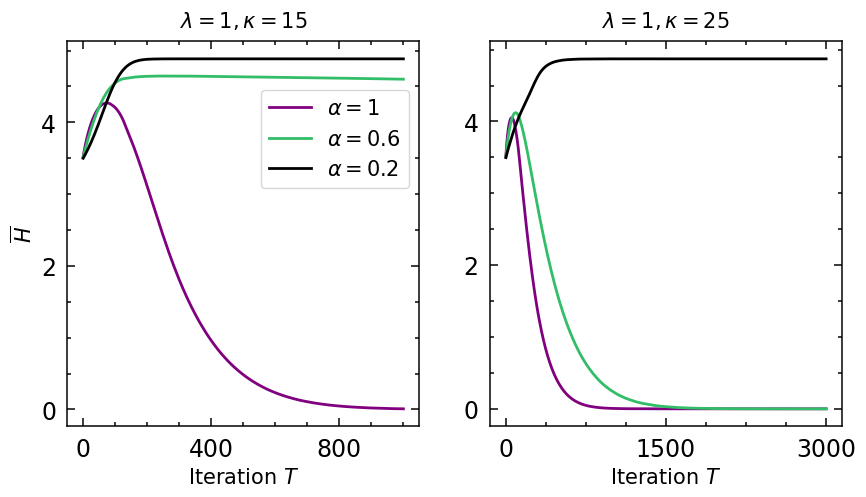

In [13]:
# parameters

nrows = 1
ncols = 2

titles = [
    r"$\lambda = 1, \kappa = 15$",
    r"$\lambda = 1, \kappa = 25$"
]
title_size = 15
single_ylabel = True
position_ylabel = "left"
ylabel = r"$\overline{H}$"
ylabel_fontsize = 15
xlabel_bottom_only = True
xlabel = r"Iteration $T$"
xlabel_fontsize = 15
axis_width = 1.08
tick_pad = 8
tick_label_size = 17
num_x_ticks = 3
num_y_ticks= 3


fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize = (5*ncols, 5*nrows))

fig, axs = classical_structure(
    fig,
    axs,
    axis_width,
    tick_pad,
    tick_label_size,
    num_x_ticks,
    num_y_ticks
)

# Text
fig, axs = format_text(
    fig,
    axs,
    titles,
    title_size,
    single_ylabel,
    position_ylabel,
    ylabel,
    ylabel_fontsize,
    xlabel_bottom_only,
    xlabel,
    xlabel_fontsize
)

# plot
line_width = 2

measure = 'entropy'

alpha_color =  {
    1: "purple",
    0.8: "darkgreen",
    0.6: "#32BD68",
    0.4: "y",
    0.2: "k"
}

X = np.arange(1, 1000 + 1)

selected_params = [x for x in params if x['kappa'] == 15 and x['lambd'] == 1 and x['gamma'] == 0]
for p in selected_params:
    axs[0].plot(X, results[make_tuple(p)][measure][:1000], c = alpha_color[p['alpha']], linewidth = line_width, label = rf'$\alpha = ${p["alpha"]}')

X = np.arange(1, 3000 + 1)
selected_params = [x for x in params if x['kappa'] == 25 and x['lambd'] == 1 and x['gamma'] == 0]
for p in selected_params:
    axs[1].plot(X, results[make_tuple(p)][measure], c = alpha_color[p['alpha']], linewidth = line_width, label = rf'$\alpha = ${p["alpha"]}')

axs[0].legend(loc = 'upper right', fontsize = 15, bbox_to_anchor=(1, 0.90))